# Analysis of Police Reports in Peru and the Department of La Libertad (2018-2025)

## 📊 Project Context
This analysis explores the police reports registered in the Police Complaint Information System (SIDPOL) at both the national and local levels (La Libertad) during the 2018-2025 period. The primary objective is to identify spatial, temporal, and crime-type patterns that can inform public safety decisions.

**Data Source:** [Peru Open Data Portal](https://www.datosabiertos.gob.pe/dataset/denuncias-policiales-1)
**Period:** January 2018 – October 2025
**Total records:** 336,922
**Tools Used:** Python, Pandas, Matplotlib, Seaborn

## 🎯 Specific Objectives
1. Analyze the temporal evolution of reports at the national and local levels.
2. Identify the most frequent types of crimes.
3. Determine the geographical distribution of reports.
4. Perform a drill-down analysis of the La Libertad region.

## 🔧 Environment Setup
Importing libraries and initial configuration for the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

%matplotlib inline

print("✅ Configured environment")

✅ Configured environment


In [2]:
df = pd.read_csv('denuncias_policiales_ENE-2018_OCT-2025.csv')
print('DataFrame dimensions:', df.shape)
print('First 5 rows of the DataFrame:')
df.head()

DataFrame dimensions: (336922, 8)
First 5 rows of the DataFrame:


,ANIO,MES,DPTO_HECHO_NEW,PROV_HECHO,DIST_HECHO,UBIGEO_HECHO,P_MODALIDADES,cantidad
0,2018,1,AMAZONAS,BAGUA,ARAMANGO,10202,Otros,6
1,2018,1,AMAZONAS,BAGUA,ARAMANGO,10202,Violencia contra la mujer e integrantes,1
2,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Estafa,2
3,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Hurto,25
4,2018,1,AMAZONAS,BAGUA,BAGUA,10201,Otros,64


In [3]:
print('Last 5 rows of the DataFrame:')
df.tail()

Last 5 rows of the DataFrame:


,ANIO,MES,DPTO_HECHO_NEW,PROV_HECHO,DIST_HECHO,UBIGEO_HECHO,P_MODALIDADES,cantidad
336917,2025,10,UCAYALI,PADRE ABAD,PADRE ABAD,250301,Hurto,3
336918,2025,10,UCAYALI,PADRE ABAD,PADRE ABAD,250301,Otros,5
336919,2025,10,UCAYALI,PADRE ABAD,PADRE ABAD,250301,Violencia contra la mujer e integrantes,2
336920,2025,10,UCAYALI,PURUS,PURUS,250401,Hurto,1
336921,2025,10,UCAYALI,PURUS,PURUS,250401,Otros,1


In [4]:
# Renaming columns to English
column_mapping = {
    'ANIO': 'year',
    'MES': 'month',
    'DPTO_HECHO_NEW': 'department',
    'PROV_HECHO': 'province',
    'DIST_HECHO': 'district',
    'UBIGEO_HECHO': 'geo_code',
    'P_MODALIDADES': 'crime_type',
    'cantidad': 'count'
}

df.rename(columns=column_mapping, inplace=True)

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336922 entries, 0 to 336921
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   year        336922 non-null  int64 
 1   month       336922 non-null  int64 
 2   department  336922 non-null  object
 3   province    336922 non-null  object
 4   district    336922 non-null  object
 5   geo_code    336922 non-null  int64 
 6   crime_type  336922 non-null  object
 7   count       336922 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 20.6+ MB


In [5]:
print('DataFrame Information:')
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336922 entries, 0 to 336921
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   year        336922 non-null  int64 
 1   month       336922 non-null  int64 
 2   department  336922 non-null  object
 3   province    336922 non-null  object
 4   district    336922 non-null  object
 5   geo_code    336922 non-null  int64 
 6   crime_type  336922 non-null  object
 7   count       336922 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 20.6+ MB


In [6]:
print('Number of unique values ​​per column:')
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

Number of unique values ​​per column:
year: 8 unique values
month: 12 unique values
department: 26 unique values
province: 195 unique values
district: 1688 unique values
geo_code: 1839 unique values
crime_type: 7 unique values
count: 899 unique values


## 📈 Analysis 1: National Temporal Evolution

### Main Finding:
The analysis reveals an upward post-pandemic trend in police reports nationwide, peaking in 2023. Following that year, there is an observed decline in the number of registered police reports.

### Methodology:

- Grouping by year and cumulative sum of reports.
- Normalization to millions for improved visualization.
- Line chart with value annotations.

### Key Insight:
The year 2023 shows the highest volume of reports, reaching 1.04 million.

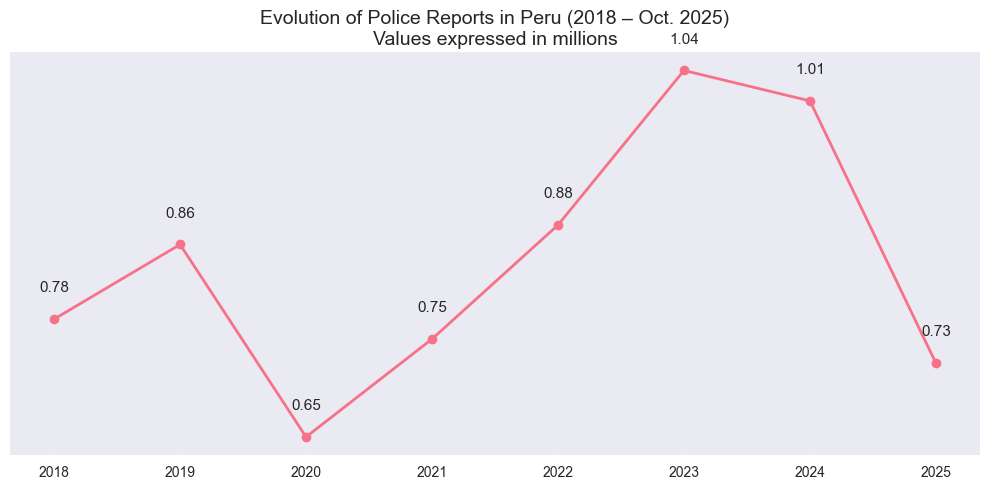

In [7]:
# Grouping by year and calculating the sum of reports
reports_by_year = df.groupby('year')['count'].sum()

# Converting values to abbreviated millions (e.g., 1.03)
values_in_millions = reports_by_year / 1_000_000

plt.figure(figsize=(10, 5))

plt.plot(
    reports_by_year.index,
    values_in_millions,
    marker='o',
    linewidth=2
)

# Chart title and formatting
plt.title("Evolution of Police Reports in Peru (2018 – Oct. 2025)\nValues expressed in millions", fontsize=14)

plt.xlabel("")
plt.ylabel("")
plt.gca().set_yticks([])

# Soft grid
plt.grid(True, linewidth=0.3, alpha=0.25)

# Remove unnecessary spines
for spine in ["top", "right", "left"]:
    plt.gca().spines[spine].set_visible(False)

# Add values above each point (e.g., 1.03)
for x, y in zip(reports_by_year.index, values_in_millions):
    plt.text(x, y + 0.03, f"{y:.2f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

## 🔍 Analysis 2: Distribution by Crime Type

### Main Finding:
The "Other" category accounts for 38.1% of all reports, followed by "Violence against women and family members" at 26.5%.

### Methodology:

- Grouping by crime category.
- Calculation of percentages relative to the total.
- Bar chart visualization with combined labels.

### Key Insight:
Property crimes (Theft and Robbery) collectively represent 30.9% of the total reports.

In [8]:
# Mapping Spanish crime categories to English
crime_mapping = {
    'Violencia contra la mujer e integrantes': 'Women/Family Violence',
    'Hurto': 'Theft',
    'Robo': 'Robbery',
    'Estafa': 'Fraud',
    'Extorsión': 'Extortion',
    'Homicidio': 'Homicide',
    'Otros': 'Others'
}

# Applying the replacement
df['crime_type'] = df['crime_type'].replace(crime_mapping)

# Verification
print(df['crime_type'].unique())

['Others' 'Women/Family Violence' 'Fraud' 'Theft' 'Robbery' 'Extortion'
 'Homicide']


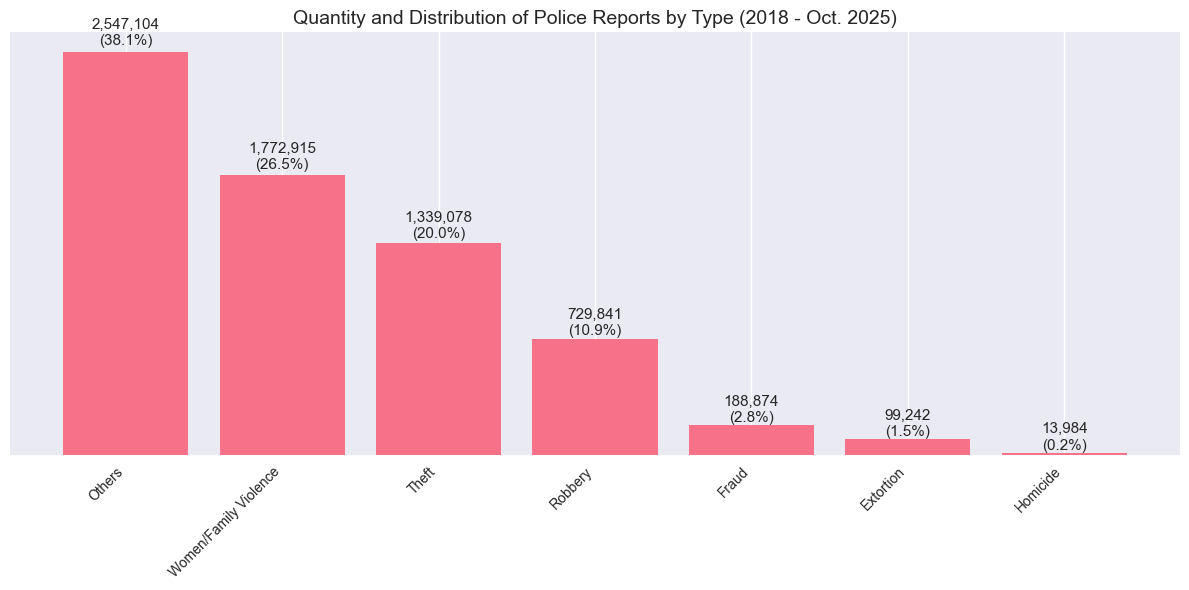

In [9]:
# Grouping by crime type and calculating total counts
common_crimes = df.groupby('crime_type')['count'].sum().sort_values(ascending=False)

total_sum = common_crimes.sum()

plt.figure(figsize=(12, 6))

bars = plt.bar(common_crimes.index, common_crimes.values)
plt.title('Quantity and Distribution of Police Reports by Type (2018 - Oct. 2025)', fontsize=14)

plt.xlabel('')
plt.ylabel('')

# Remove vertical axis values
plt.gca().set_yticks([])

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove unnecessary spines
for spine in ['top', 'right', 'left']:
    plt.gca().spines[spine].set_visible(False)

# Data labels above each bar (Count and Percentage)
for bar in bars:
    height = bar.get_height()
    
    percentage = (height / total_sum) * 100
    
    # Combined label: Count and Percentage with a line break
    label = f'{height:,.0f}\n({percentage:.1f}%)'
    
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + (height * 0.01),
        label,
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.tight_layout()
plt.show()

## 🗺️ Analysis 3: Geographical Distribution by Department

### Main Finding:
Metropolitan Lima concentrates 35.16% of all reports in the country, followed by Arequipa (6.97%) and Lambayeque (5.80%). Additionally, the department of La Libertad ranks 4th with 5.23%.

### Methodology:

- Grouping by department.
- Calculation of totals and percentages.
- Ordered horizontal bar chart.
- Pivot table with a breakdown by crime type.

### Key Insight:
The top 5 departments with the highest incidence account for 58.21% of national reports.

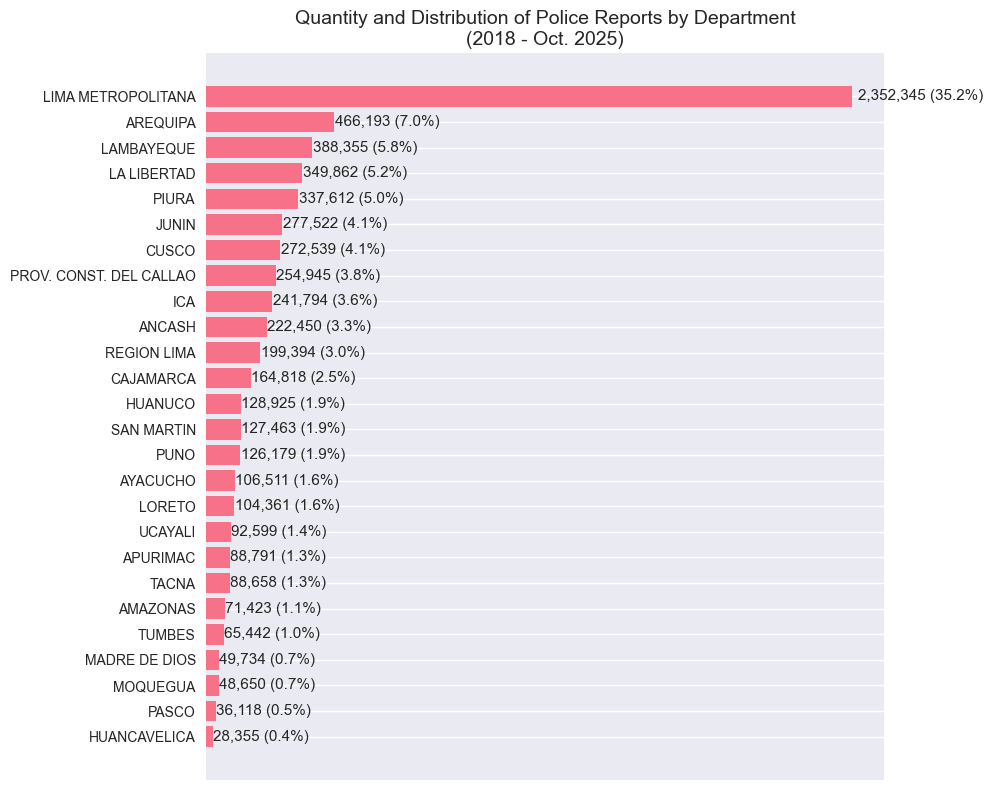

In [10]:
# Grouping by department and calculating total reports
reports_by_dept = df.groupby('department')['count'].sum().sort_values()

total_sum = reports_by_dept.sum()

plt.figure(figsize=(10, 8))

# Creating horizontal bar chart
bars = plt.barh(reports_by_dept.index, reports_by_dept.values)
plt.title('Quantity and Distribution of Police Reports by Department\n(2018 - Oct. 2025)', fontsize=14)

plt.ylabel('')
plt.xlabel('')
plt.gca().set_xticks([])  # Remove horizontal axis values

# Remove unnecessary spines
for spine in ['top', 'right', 'bottom']:
    plt.gca().spines[spine].set_visible(False)

# Data labels next to each bar (Count and Percentage)
for bar in bars:
    width = bar.get_width()
    
    percentage = (width / total_sum) * 100
    
    # Combined label: Count and Percentage
    label = f'{width:,.0f} ({percentage:.1f}%)' 
    
    plt.text(
        width + (width * 0.01), # Position the label slightly to the right of the bar end
        bar.get_y() + bar.get_height() / 2,
        label,
        ha='left',
        va='center',
        fontsize=11
    )

plt.tight_layout()
plt.show()

* Furthermore, based on the breakdown by crime type, Metropolitan Lima and La Libertad record the highest number of extortion reports, with 39,463 and 18,148 cases respectively.

* It is also noted that Metropolitan Lima and Arequipa report the highest incidence of family violence, with 584,341 and 132,784 cases respectively.

* Additionally, the data shows that Metropolitan Lima and Piura concentrate the highest number of robbery reports, with 353,901 and 53,568 cases respectively.

In [11]:
# Create pivot table by department and crime type
summary_table = (
    df.pivot_table(
        index='department',
        columns='crime_type',
        values='count',
        aggfunc='sum',
        fill_value=0
    )
)

# 1. Calculate the TOTAL per department
summary_table['TOTAL'] = summary_table.sum(axis=1)

# 2. Calculate the Overall Total
grand_total = summary_table['TOTAL'].sum()

# 3. Calculate the PERCENTAGE column
summary_table['PERCENTAGE'] = (summary_table['TOTAL'] / grand_total) * 100

# 4. Sort by total in descending order
summary_table = summary_table.sort_values(by='TOTAL', ascending=False)

# 5. Format the table for presentation
# Create a dictionary with formatting for ALL columns except percentage
column_formatting = {
    col: '{:,.0f}' for col in summary_table.columns if col != 'PERCENTAGE'
}
# Add specific formatting for the PERCENTAGE column
column_formatting['PERCENTAGE'] = '{:,.2f}%'

# Apply the consolidated formatting using .style.format()
formatted_summary_table = summary_table.style.format(column_formatting)

print("REPORTS BY DEPARTMENT AND CRIME TYPE (2018 - OCT. 2025)")
formatted_summary_table

REPORTS BY DEPARTMENT AND CRIME TYPE (2018 - OCT. 2025)


crime_type,Extortion,Fraud,Homicide,Others,Robbery,Theft,Women/Family Violence,TOTAL,PERCENTAGE
department,,,,,,,,,
LIMA METROPOLITANA,"39,463","76,990","4,535","758,651","353,901","534,464","584,341","2,352,345",35.16%
AREQUIPA,"2,019","12,346",379,"205,421","30,227","83,017","132,784","466,193",6.97%
LAMBAYEQUE,"3,688","10,493",335,"153,303","42,030","99,045","79,461","388,355",5.80%
LA LIBERTAD,"18,148","10,679","1,263","130,394","44,362","70,066","74,950","349,862",5.23%
PIURA,"9,302","8,878",657,"111,062","53,568","65,141","89,004","337,612",5.05%
JUNIN,"1,366","5,682",464,"125,208","19,524","48,881","76,397","277,522",4.15%
CUSCO,721,"6,662",459,"129,146","9,266","41,936","84,349","272,539",4.07%
PROV. CONST. DEL CALLAO,"3,367","6,593","1,300","96,002","32,581","40,614","74,488","254,945",3.81%
ICA,"3,018","7,312",591,"89,707","31,374","43,123","66,669","241,794",3.61%


## 🎯 Analysis 4: Drill-Down on Critical Department

### Focus on La Libertad (5.23% of national total)
This department was selected due to its position among the top 5 departments with the highest crime incidence. Furthermore, as a resident of this region, I chose this focus to demonstrate a granular analysis methodology.

### Main Finding:
The province of Trujillo concentrates 69.06% of the reports in the department, with an average of 37,232 annual reports in the post-pandemic period (2022-2024).

### Methodology:

- Filtering by department and the 2022-2024 period.
- Grouping by province.
- Calculation of averages and percentages.

In [12]:
# Create pivot table for La Libertad province-level analysis (2022-2024)
summary_table_prov = (
    df[(df['department'] == 'LA LIBERTAD') & 
       (df['year'].between(2022, 2024))].pivot_table(
        index='province',
        columns='year',
        values='count',
        aggfunc='sum',
        fill_value=0
    )
)

# 1. Calculate the TOTAL
summary_table_prov['TOTAL'] = summary_table_prov.sum(axis=1)

# 2. Calculate the AVERAGE
# The average is calculated by dividing the TOTAL by the number of years (3 years: 2022, 2023, 2024)
year_columns_count = len([col for col in summary_table_prov.columns if col not in ['TOTAL']])
summary_table_prov['AVERAGE'] = summary_table_prov['TOTAL'] / year_columns_count

# 3. Calculate the PERCENTAGE (relative to the overall total of all provinces)
grand_total_libertad = summary_table_prov['TOTAL'].sum()
summary_table_prov['PERCENTAGE'] = (summary_table_prov['TOTAL'] / grand_total_libertad) * 100

# 4. Sort and Format
summary_table_prov = summary_table_prov.sort_values(by='TOTAL', ascending=False)

# Use .style.format to format columns for presentation
formatted_prov_table = summary_table_prov.style.format({
    2022: '{:,.0f}',
    2023: '{:,.0f}',
    2024: '{:,.0f}',
    'TOTAL': '{:,.0f}',
    'AVERAGE': '{:,.2f}',
    'PERCENTAGE': '{:,.2f}%'
})

print("POLICE REPORTS BY PROVINCE IN THE DEPARTMENT OF LA LIBERTAD (2022-2024)")
formatted_prov_table

POLICE REPORTS BY PROVINCE IN THE DEPARTMENT OF LA LIBERTAD (2022-2024)


year,2022,2023,2024,TOTAL,AVERAGE,PERCENTAGE
province,,,,,,
TRUJILLO,"31,890","39,272","40,535","111,697","37,232.33",69.06%
PACASMAYO,"3,034","3,648","3,627","10,309","3,436.33",6.37%
ASCOPE,"3,204","3,588","3,295","10,087","3,362.33",6.24%
VIRU,"3,051","3,348","3,311","9,710","3,236.67",6.00%
CHEPEN,"2,652","2,836","2,544","8,032","2,677.33",4.97%
SANCHEZ CARRION,"1,318","1,466","1,464","4,248","1,416.00",2.63%
PATAZ,836,807,892,"2,535",845.00,1.57%
OTUZCO,634,888,787,"2,309",769.67,1.43%
SANTIAGO DE CHUCO,396,488,487,"1,371",457.00,0.85%


## 🏙️ Analysis 5: Drill-Down on the Province of Trujillo

### Main Finding:
The district of Trujillo (the provincial capital) accounts for 52.09% of the reports within the province.

### Methodology:

- Filtering by the province of Trujillo.
- Grouping by district.
- Calculation of percentage contribution.

In [13]:
# Create pivot table for Trujillo district-level analysis (2022-2024)
summary_table_dist = (
    df[(df['department'] == 'LA LIBERTAD') & 
       (df['province'] == 'TRUJILLO') & 
       (df['year'].between(2022, 2024))].pivot_table(
        index='district',
        columns='year',
        values='count',
        aggfunc='sum',
        fill_value=0
    )
)

# 1. Calculate the TOTAL
summary_table_dist['TOTAL'] = summary_table_dist.sum(axis=1)

# 2. Calculate the AVERAGE
# The average is calculated by dividing the TOTAL by the number of years (3 years: 2022, 2023, 2024)
year_columns_count = len([col for col in summary_table_dist.columns if col not in ['TOTAL']])
summary_table_dist['AVERAGE'] = summary_table_dist['TOTAL'] / year_columns_count

# 3. Calculate the PERCENTAGE (relative to the overall total of all districts in Trujillo)
grand_total_trujillo = summary_table_dist['TOTAL'].sum()
summary_table_dist['PERCENTAGE'] = (summary_table_dist['TOTAL'] / grand_total_trujillo) * 100

# 4. Sort and Format
summary_table_dist = summary_table_dist.sort_values(by='TOTAL', ascending=False)

# Use .style.format to format columns for presentation
formatted_dist_table = summary_table_dist.style.format({
    2022: '{:,.0f}',
    2023: '{:,.0f}',
    2024: '{:,.0f}',
    'TOTAL': '{:,.0f}',
    'AVERAGE': '{:,.2f}',
    'PERCENTAGE': '{:,.2f}%'
})

print("POLICE REPORTS BY DISTRICT IN THE PROVINCE OF TRUJILLO (2022-2024)")
formatted_dist_table

POLICE REPORTS BY DISTRICT IN THE PROVINCE OF TRUJILLO (2022-2024)


year,2022,2023,2024,TOTAL,AVERAGE,PERCENTAGE
district,,,,,,
TRUJILLO,"15,258","21,045","21,880","58,183","19,394.33",52.09%
LA ESPERANZA,"4,450","4,714","5,108","14,272","4,757.33",12.78%
EL PORVENIR,"4,153","4,420","4,211","12,784","4,261.33",11.45%
HUANCHACO,"1,889","2,375","2,211","6,475","2,158.33",5.80%
FLORENCIA DE MORA,"1,739","1,686","1,670","5,095","1,698.33",4.56%
VICTOR LARCO HERRERA,"1,231","1,726","1,908","4,865","1,621.67",4.36%
MOCHE,"1,046","1,412","1,753","4,211","1,403.67",3.77%
LAREDO,"1,300","1,050","1,074","3,424","1,141.33",3.07%
SALAVERRY,637,660,535,"1,832",610.67,1.64%


## 📊 Analysis 6: Crime Composition in the District of Trujillo

### Main Finding:
In the district of Trujillo (2022-2024, post-pandemic):

* **Theft** accounts for 29.95% of the total.
* **Robbery** accounts for 16.01%.
* **Women/Family Violence** accounts for 14.06%.

Together, these three categories concentrate 60.02% of all police reports.

### Methodology:

- Filtering by the district of Trujillo.
- Pivot table by crime type and year.
- Calculation of year-over-year trends.
- Comparative visualization (grouped bar charts and distribution).

In [14]:
# Create pivot table for crime composition in Trujillo district (2022-2024)
summary_table_trux = (
    df[(df['province'] == 'TRUJILLO') & 
       (df['district'] == 'TRUJILLO') & 
       (df['year'].between(2022, 2024))].pivot_table(
        index='crime_type',
        columns='year',
        values='count',
        aggfunc='sum',
        fill_value=0
    )
)

# 1. Calculate the TOTAL
summary_table_trux['TOTAL'] = summary_table_trux.sum(axis=1)

# 2. Calculate the AVERAGE
# Average is calculated by dividing TOTAL by the number of years (3 years: 2022, 2023, 2024)
year_columns_count = len([col for col in summary_table_trux.columns if col not in ['TOTAL']])
summary_table_trux['AVERAGE'] = summary_table_trux['TOTAL'] / year_columns_count

# 3. Calculate the PERCENTAGE (relative to the overall total for all crime types)
grand_total_trux = summary_table_trux['TOTAL'].sum()
summary_table_trux['PERCENTAGE'] = (summary_table_trux['TOTAL'] / grand_total_trux) * 100

# 4. Sort and Format
summary_table_trux = summary_table_trux.sort_values(by='TOTAL', ascending=False)

# Use .style.format to format the columns for visualization
formatted_trux_table = summary_table_trux.style.format({
    2022: '{:,.0f}',
    2023: '{:,.0f}',
    2024: '{:,.0f}',
    'TOTAL': '{:,.0f}',
    'AVERAGE': '{:,.2f}',
    'PERCENTAGE': '{:,.2f}%'
})

print("POLICE REPORTS BY TYPE IN THE DISTRICT OF TRUJILLO (2022-2024)")
formatted_trux_table

POLICE REPORTS BY TYPE IN THE DISTRICT OF TRUJILLO (2022-2024)


year,2022,2023,2024,TOTAL,AVERAGE,PERCENTAGE
crime_type,,,,,,
Theft,"4,003","6,561","6,859","17,423","5,807.67",29.95%
Others,"5,232","5,553","6,492","17,277","5,759.00",29.69%
Robbery,"2,045","4,009","3,262","9,316","3,105.33",16.01%
Women/Family Violence,"2,522","3,004","2,657","8,183","2,727.67",14.06%
Fraud,868,"1,117","1,243","3,228","1,076.00",5.55%
Extortion,557,754,"1,341","2,652",884.00,4.56%
Homicide,31,47,26,104,34.67,0.18%


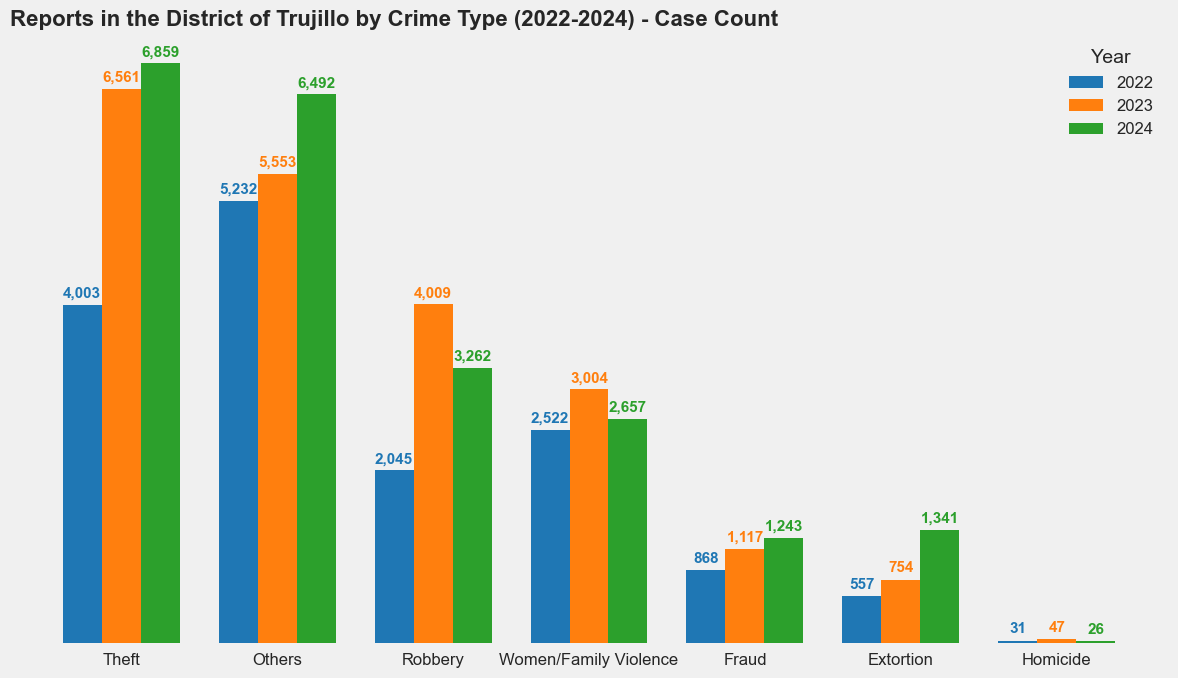

In [15]:
# --- DATA PREPARATION ---
# Selecting only the columns for years 2022, 2023, and 2024
df_plot = summary_table_trux[[2022, 2023, 2024]]

# Resetting the index
df_plot = df_plot.reset_index()

# Renaming the crime type column for a cleaner plot
df_plot.rename(columns={'crime_type': 'Crime Type'}, inplace=True)


# --- GROUPED BAR CHART CREATION ---

# Using 'fivethirtyeight' style for a clean, professional look
plt.style.use('fivethirtyeight') 

fig, ax = plt.subplots(figsize=(12, 7))

# Parameters for the grouped bar chart
bar_width = 0.25 
index = range(len(df_plot['Crime Type'])) 

# Function to add value labels
def add_labels(bars, color):
    for bar in bars:
        height = bar.get_height()
        # Only add the label if height is greater than 0
        if height > 0:
            ax.annotate(
                f'{int(height):,}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', 
                va='bottom',
                fontsize=11,
                color=color, # Matching color for elegance
                fontweight='bold'
            )

# 1. Bars for 2022
bars_2022 = ax.bar(
    [i - bar_width for i in index], 
    df_plot[2022], 
    bar_width, 
    label='2022', 
    color='#1f77b4' # Blue
)

# 2. Bars for 2023
bars_2023 = ax.bar(
    index, 
    df_plot[2023], 
    bar_width, 
    label='2023', 
    color='#ff7f0e' # Orange
)

# 3. Bars for 2024
bars_2024 = ax.bar(
    [i + bar_width for i in index], 
    df_plot[2024], 
    bar_width, 
    label='2024', 
    color='#2ca02c' # Green
)

# --- AXIS CLEANUP AND FORMATTING ---

# Main Title (Specifying the unit of measurement)
ax.set_title(
    'Reports in the District of Trujillo by Crime Type (2022-2024) - Case Count', 
    fontsize=16, 
    fontweight='bold',
    loc='left' # Left-justified title for a modern look
)

# Remove Y-axis markings and labels
ax.set_yticks([]) 
ax.set_ylabel('')

# Remove X-axis title
ax.set_xlabel('') 

# X-axis Labels: Displaying crime types
ax.set_xticks(index)
ax.set_xticklabels(df_plot['Crime Type'], rotation=0, ha="center", fontsize=12)

# Remove grid lines and spines for a clean design
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Legend setup
ax.legend(
    loc='upper right', 
    title='Year', 
    frameon=False, 
    ncol=1, 
    bbox_to_anchor=(1.0, 1.0),
    fontsize=12
)

# Adding value labels to the bars
add_labels(bars_2022, '#1f77b4')
add_labels(bars_2023, '#ff7f0e')
add_labels(bars_2024, '#2ca02c')

plt.tight_layout() 
plt.show()

C:\Users\dadp2\AppData\Local\Temp\ipykernel_12192\2999071373.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df_distribution['Crime Type'], fontsize=12)


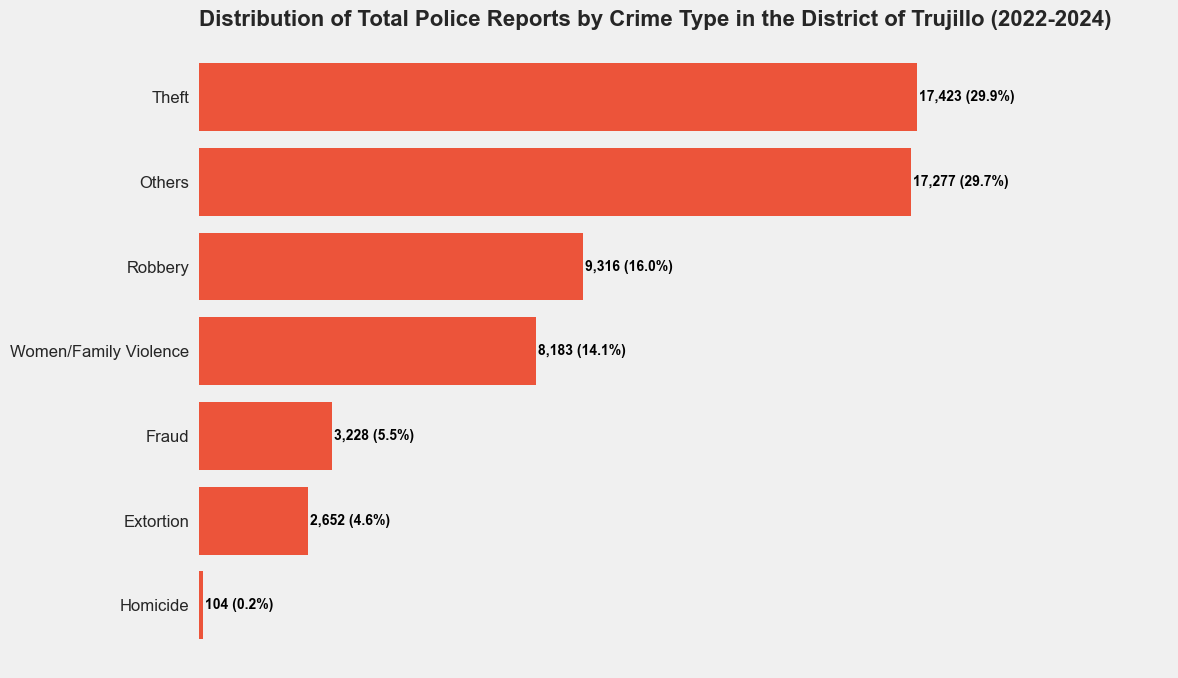

In [16]:
# --- 1. DATA PREPARATION ---
# Using the summary table for Trujillo (already sorted)
# Resetting the index to access 'crime_type' as a column
df_distribution = summary_table_trux.reset_index()
df_distribution.rename(columns={'crime_type': 'Crime Type'}, inplace=True)


# --- 2. HORIZONTAL BAR CHART CREATION ---

plt.style.use('fivethirtyeight') 

# Adjusting size for better visibility of long labels
fig, ax = plt.subplots(figsize=(12, 7)) 

bar_color = "#ec543a" 

# Create horizontal bars
bars = ax.barh(
    df_distribution['Crime Type'], 
    df_distribution['TOTAL'], 
    color=bar_color
)

# Invert Y-axis so the highest TOTAL is at the top
ax.invert_yaxis() 

# --- 3. PROFESSIONAL FORMATTING ---

# Main Title
ax.set_title(
    'Distribution of Total Police Reports by Crime Type in the District of Trujillo (2022-2024)', 
    fontsize=16, 
    fontweight='bold',
    loc='left'
)

# Y-axis cleanup
ax.tick_params(axis='y', length=0) 
ax.set_yticklabels(df_distribution['Crime Type'], fontsize=12)

# X-axis cleanup
ax.set_xlabel('') 
ax.set_xticks([]) # Remove horizontal axis ticks

# Remove grid lines and spines
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# 4. Add Value Labels (TOTAL and PERCENTAGE)
for i, bar in enumerate(bars):
    
    # Get values for the current row
    total = df_distribution.loc[i, 'TOTAL']
    percentage = df_distribution.loc[i, 'PERCENTAGE']
    
    # Label placement (Total and Percentage on the right)
    ax.text(
        x=total + 50, # Fixed offset from the bar end
        y=bar.get_y() + bar.get_height() / 2,
        s=f'{int(total):,} ({percentage:.1f}%)',
        ha='left', 
        va='center',
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# 5. Adjust X limit to make room for labels
ax.set_xlim(right=df_distribution['TOTAL'].max() * 1.35) 

plt.tight_layout() 
plt.show()

In [17]:
# --- Filter Definitions and Constants ---
TARGET_DISTRICT = 'TRUJILLO'
PROJECTION_YEAR = 2025
AVAILABLE_MONTHS = 10 # January to October

# -------------------------------------------------------------
## 1. Filtering and Historical Average Calculation (2022-2024)
# -------------------------------------------------------------

# Filter data for Trujillo district and historical years
historical_df = df[
    (df['province'] == 'TRUJILLO') & 
    (df['district'] == TARGET_DISTRICT) & 
    (df['year'].between(2022, 2024))
]

# Calculate TOTAL reports by CRIME TYPE and YEAR
historical_pivot = historical_df.pivot_table(
    index='crime_type',
    columns='year',
    values='count',
    aggfunc='sum',
    fill_value=0
)

# Calculate the 3-year average (2022, 2023, 2024)
historical_pivot['ANNUAL_AVG_22_24'] = historical_pivot.sum(axis=1) / 3


# -------------------------------------------------------------
## 2. 2025 Projected Total Calculation (Up to October)
# -------------------------------------------------------------

# Filter data for Trujillo district and incomplete 2025 months
df_2025_partial = df[
    (df['district'] == TARGET_DISTRICT) & 
    (df['year'] == PROJECTION_YEAR) & 
    (df['month'].between(1, AVAILABLE_MONTHS))
]

# Calculate partial TOTAL reports by CRIME TYPE for 2025 (10 months)
partial_total_2025 = df_2025_partial.groupby('crime_type')['count'].sum().reset_index()
partial_total_2025.rename(columns={'count': 'PARTIAL_TOTAL_2025'}, inplace=True)

# Calculate 2025 Annualized Projection
# Projection = (Partial Total / Available Months) * 12
partial_total_2025['ANNUAL_PROJECTED_2025'] = (
    partial_total_2025['PARTIAL_TOTAL_2025'] / AVAILABLE_MONTHS
) * 12


# -------------------------------------------------------------
## 3. Combination and Formatting for the Chart
# -------------------------------------------------------------

# Join historical average and projected total
comparison_table = pd.merge(
    historical_pivot[['ANNUAL_AVG_22_24']],
    partial_total_2025[['crime_type', 'ANNUAL_PROJECTED_2025']],
    on='crime_type',
    how='inner' # Only include crime types present in both periods
)

# Sort by Historical Average for a better visualization
comparison_table = comparison_table.sort_values(
    by='ANNUAL_AVG_22_24', 
    ascending=False
)

# Apply formatting for display
formatted_comparison_table = comparison_table.style.format({
    'ANNUAL_AVG_22_24': '{:,.2f}',
    'ANNUAL_PROJECTED_2025': '{:,.2f}'
})

print("ADJUSTED COMPARISON TABLE FOR THE DISTRICT OF TRUJILLO")
formatted_comparison_table

ADJUSTED COMPARISON TABLE FOR THE DISTRICT OF TRUJILLO


,crime_type,ANNUAL_AVG_22_24,ANNUAL_PROJECTED_2025
5,Theft,"5,807.67","4,404.00"
3,Others,"5,759.00","6,421.20"
4,Robbery,"3,105.33","1,246.80"
6,Women/Family Violence,"2,727.67","2,145.60"
1,Fraud,"1,076.00","1,014.00"
0,Extortion,884.00,"1,282.80"
2,Homicide,34.67,33.60


## 📈 2025 Projection: Changes in the Crime Landscape

### Critical Trends Detected:
- **Extortion:** +45.1% (Alarming increase)
- **Others:** +11.5% (Criminal diversification)
- **Theft:** -24.1% (Significant improvement)
- **Robbery:** -59.9% (Drastic reduction)

### Interpretation:
The pattern suggests a shift from traditional property crimes toward more complex modalities (extortion) and unspecified categories ("Others").

### Recommended Action:
Strengthen specialized extortion units and review the "Others" categorization to improve strategic targeting.

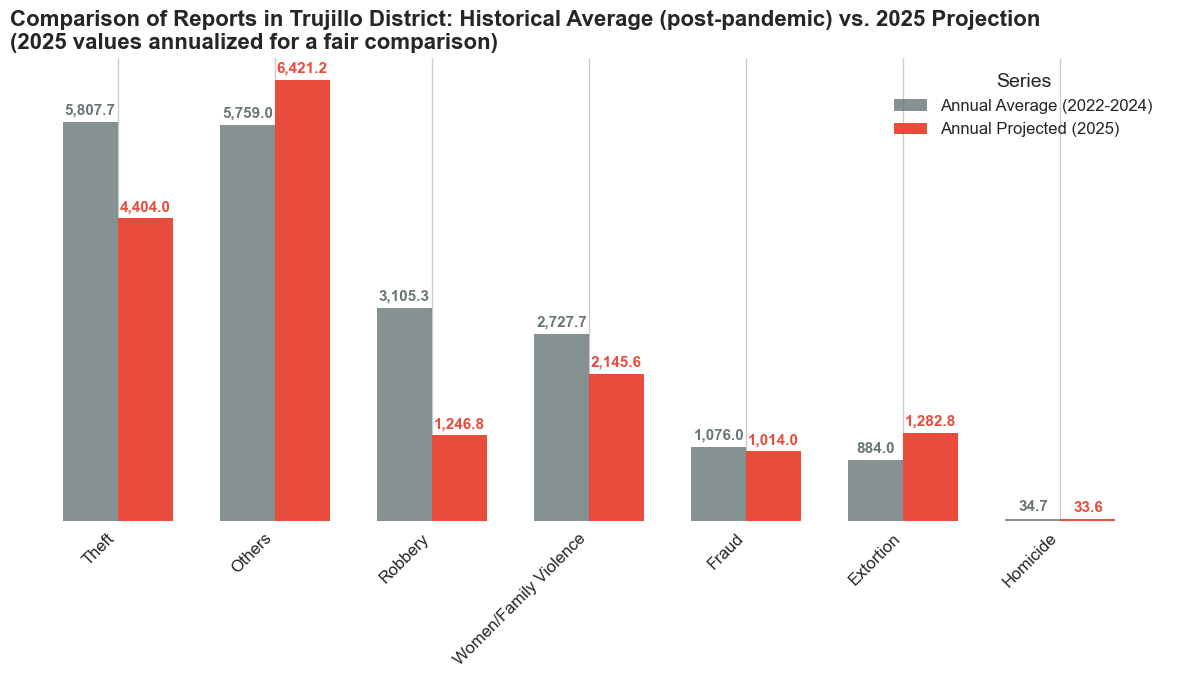

In [18]:
# --- DATA PREPARATION ---
df_comp_plot = comparison_table.reset_index()

# Rename columns for the chart
df_comp_plot.rename(columns={'crime_type': 'Crime Type'}, inplace=True)

# Series to plot (Based on previous translation)
HISTORICAL_AVG = 'ANNUAL_AVG_22_24'
PROJECTED_SERIES = 'ANNUAL_PROJECTED_2025'


# --- GROUPED BAR CHART CREATION ---

# Using a clean, high-contrast style
plt.style.use('seaborn-v0_8-whitegrid') 

fig, ax = plt.subplots(figsize=(12, 7))

# Grouped chart parameters
bar_width = 0.35
index = range(len(df_comp_plot['Crime Type']))

# Color definitions:
HISTORICAL_COLOR = "#687677" # Light Gray (Baseline)
PROJECTION_COLOR = '#e74c3c' # Red/Orange (Current trend)

# 1. Bars for Historical Average (2022-2024)
bars_avg = ax.bar(
    [i - bar_width/2 for i in index], 
    df_comp_plot[HISTORICAL_AVG], 
    bar_width, 
    label='Annual Average (2022-2024)', 
    color=HISTORICAL_COLOR,
    alpha=0.8
)

# 2. Bars for Projected Total (2025)
bars_projected = ax.bar(
    [i + bar_width/2 for i in index], 
    df_comp_plot[PROJECTED_SERIES], 
    bar_width, 
    label='Annual Projected (2025)', 
    color=PROJECTION_COLOR
)

# --- PROFESSIONAL FORMATTING (Minimalist) ---

# Main Title (Context for annualized adjustment)
ax.set_title(
    'Comparison of Reports in Trujillo District: Historical Average (post-pandemic) vs. 2025 Projection\n(2025 values annualized for a fair comparison)', 
    fontsize=16, 
    fontweight='bold',
    loc='left'
)

# X-axis Labels:
ax.set_xticks(index)
ax.set_xticklabels(df_comp_plot['Crime Type'], rotation=45, ha="right", fontsize=12)

# Visual Cleanup: Remove Y-axis markings and X-axis title
ax.set_yticks([]) 
ax.set_ylabel('')  
ax.set_xlabel('') 

# Legend (Upper Right)
ax.legend(
    loc='upper right', 
    frameon=False, 
    ncol=1, 
    title='Series',
    bbox_to_anchor=(1.0, 1.0),
    fontsize=12
)

# Function to add value labels
def add_labels(bars, color):
    for bar in bars:
        height = bar.get_height()
        # Showing values with one decimal for averages/projections
        ax.annotate(
            f'{height:,.1f}', 
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  
            textcoords="offset points",
            ha='center', 
            va='bottom',
            fontsize=11,
            color=color,
            fontweight='bold'
        )

# Add value labels
add_labels(bars_avg, HISTORICAL_COLOR)
add_labels(bars_projected, PROJECTION_COLOR)

# Remove frame lines (spines)
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.tight_layout()
plt.show()

## 📝 Conclusions and Recommendations

### Consolidated Findings:

1. **Extreme Geographical Concentration:** Metropolitan Lima accounts for more than one-third of all national police reports.

2. **Predominant Crime Typology:** The "Others" category (broadly defined) and property crimes dominate the criminal landscape.

3. **Temporal Trend:** Steady growth until 2023, followed by a slight decrease from 2024 onwards.

4. **Intra-departmental Concentration Pattern:** In La Libertad, the province of Trujillo concentrates 69% of the reports, and within it, the namesake district accounts for 52%.

### Analysis Limitations:

- Partial 2025 Data: Dataset only includes records up to October.
- Undefined Categories: The "Others" category is very broad and lacks specificity.
- Population Normalization: The analysis does not yet adjust for population size (rates per 100k inhabitants).

### Practical Applications:

1. **Resource Allocation:** Focus patrols in districts with the highest concentration of Theft and Robbery.
2. **Prevention:** Design specific campaigns based on the predominant crime types in each zone.
3. **Monitoring:** Perform quarterly tracking of the top 5 crime modalities in critical areas.

### Next Steps:

1. Calculate crime rates per 100,000 inhabitants using INEI population data.
2. Analyze monthly seasonality for specific crimes.
3. Integrate socioeconomic data for multivariate analysis.

---

**Powered by:** Python 3.13, Pandas, Matplotlib, Seaborn

**Analysis Date:** November 30, 2025 30/11/2025

**Contact:** Daniel Domínguez / [dadp255@gmail.com](mailto:dadp255@gmail.com)